# Methods to handle Missing Values

# 1.Imputation

# 2. Dropping

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
dataset = pd.read_csv("melb_data.csv")

In [5]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
dataset.shape

(13580, 21)

In [8]:
dataset['BuildingArea']

0          NaN
1         79.0
2        150.0
3          NaN
4        142.0
         ...  
13575      NaN
13576    133.0
13577      NaN
13578    157.0
13579    112.0
Name: BuildingArea, Length: 13580, dtype: float64

In [10]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Measures of Central Tendency


In [13]:
dataset['BuildingArea'].mean()

151.96764988779805

In [14]:
dataset['BuildingArea'].median()

126.0

In [15]:
dataset['BuildingArea'].mode()

0    120.0
dtype: float64

In [16]:
dataset['YearBuilt'].mean()

1964.6842169408897

In [17]:
dataset['YearBuilt'].median()

1970.0

In [18]:
dataset['YearBuilt'].mode()

0    1970.0
dtype: float64

# When To use Mean,Median,Mode

<AxesSubplot:xlabel='BuildingArea', ylabel='Count'>

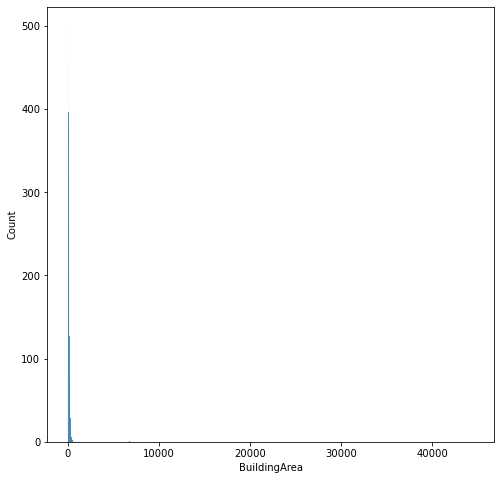

In [28]:
fig,ax = plt.subplots(figsize=(8,8))
sns.histplot(dataset.BuildingArea)

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

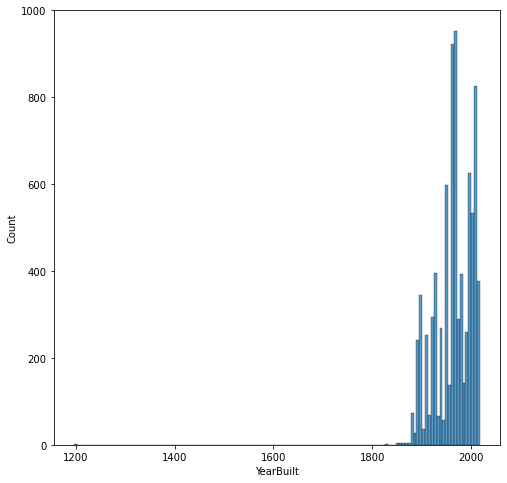

In [29]:
fig,ax = plt.subplots(figsize=(8,8))
sns.histplot(dataset.YearBuilt)

<AxesSubplot:xlabel='Car', ylabel='Count'>

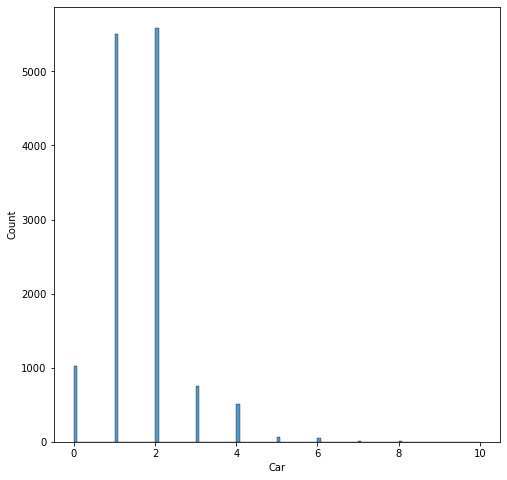

In [30]:
fig,ax = plt.subplots(figsize=(8,8))
sns.histplot(dataset.Car)

In [32]:
dataset['Car'].fillna(dataset['Car'].median(),inplace=True)

In [33]:
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [35]:
dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean(),inplace=True)

In [36]:
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [37]:
dataset['YearBuilt'].fillna(dataset['YearBuilt'].median(),inplace=True)

In [38]:
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [39]:
dataset['CouncilArea']

0        Yarra
1        Yarra
2        Yarra
3        Yarra
4        Yarra
         ...  
13575      NaN
13576      NaN
13577      NaN
13578      NaN
13579      NaN
Name: CouncilArea, Length: 13580, dtype: object

In [40]:
dataset['CouncilArea'].mode()

0    Moreland
dtype: object

In [41]:
dataset['CouncilArea'].fillna(dataset['CouncilArea'].mode(),inplace=True)

In [42]:
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [45]:
dataset['CouncilArea'].fillna(dataset['CouncilArea'].mode(),inplace=True)

In [46]:
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [49]:
d=dataset['CouncilArea']

In [50]:
d.fillna(d.mode(),inplace=True)

In [51]:
d

0        Yarra
1        Yarra
2        Yarra
3        Yarra
4        Yarra
         ...  
13575      NaN
13576      NaN
13577      NaN
13578      NaN
13579      NaN
Name: CouncilArea, Length: 13580, dtype: object

In [52]:
d.tail()

13575    NaN
13576    NaN
13577    NaN
13578    NaN
13579    NaN
Name: CouncilArea, dtype: object

In [57]:
d.head()

0    Yarra
1    Yarra
2    Yarra
3    Yarra
4    Yarra
Name: CouncilArea, dtype: object

In [58]:
print(d)

0        Yarra
1        Yarra
2        Yarra
3        Yarra
4        Yarra
         ...  
13575      NaN
13576      NaN
13577      NaN
13578      NaN
13579      NaN
Name: CouncilArea, Length: 13580, dtype: object
